In [1]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from google.colab import files
import io  
from sklearn import metrics
%matplotlib inline





In [2]:
uploaded = files.upload()

Saving MCSDatasetNEXTCONLab.csv to MCSDatasetNEXTCONLab.csv


In [5]:
dataset = pd.read_csv(io.BytesIO(uploaded["MCSDatasetNEXTCONLab.csv"]))

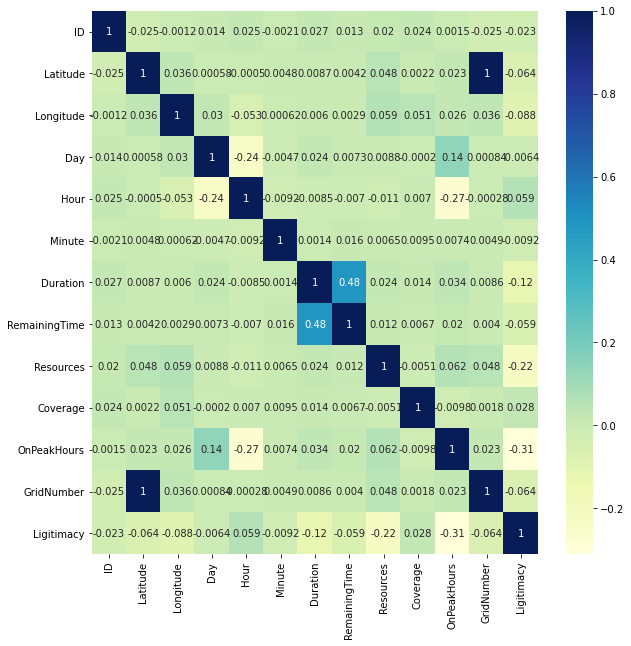

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

In [7]:
dataset.isnull().sum()

ID               0
Latitude         0
Longitude        0
Day              0
Hour             0
Minute           0
Duration         0
RemainingTime    0
Resources        0
Coverage         0
OnPeakHours      0
GridNumber       0
Ligitimacy       0
dtype: int64

In [8]:
dataset = data.drop(columns= ["Ligitimacy","ID","GridNumber"])
labels = data["Ligitimacy"]

In [9]:
dataset.describe()

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours
count,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000
mean,45.484035,-75.217603,2.513946,12.348177,29.480185,44.219829,27.109914,5.838097,65.292184,0.182822
std,0.058989,0.054501,1.704509,6.538839,17.353324,14.511027,14.993890,2.878052,20.311306,0.386534
min,45.365600,-75.334116,0.000000,0.000000,0.000000,10.000000,10.000000,1.000000,30.000000,0.000000
25%,45.434521,-75.264506,1.000000,7.000000,14.000000,30.000000,10.000000,3.000000,48.000000,0.000000
50%,45.484917,-75.220013,2.000000,13.000000,29.000000,50.000000,20.000000,6.000000,65.000000,0.000000
75%,45.541527,-75.173048,4.000000,18.000000,45.000000,60.000000,40.000000,8.000000,82.000000,0.000000
max,45.584678,-75.088915,6.000000,23.000000,59.000000,60.000000,60.000000,10.000000,100.000000,1.000000


In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

### Applying Random Forest 

In [11]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RF_Pred=clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, RF_Pred))

Accuracy: 0.9958577839143942


In [13]:
print(classification_report(y_test , RF_Pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       376
           1       1.00      1.00      1.00      2521

    accuracy                           1.00      2897
   macro avg       1.00      0.99      0.99      2897
weighted avg       1.00      1.00      1.00      2897



### Checking Feature importance 

In [14]:
feature_imp = pd.Series(clf.feature_importances_,index=dataset.columns).sort_values(ascending=False)
feature_imp

Longitude        0.257218
Latitude         0.242595
Hour             0.119120
Resources        0.093779
Coverage         0.082076
OnPeakHours      0.071676
Duration         0.047871
Day              0.038314
Minute           0.034528
RemainingTime    0.012824
dtype: float64

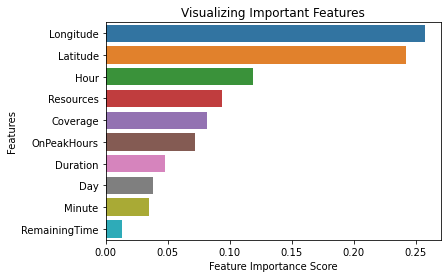

In [15]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [16]:
dataset_feature_importance = dataset.drop(columns=["Day","Minute","RemainingTime", "Duration","Coverage"])

In [17]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dataset_feature_importance, labels, test_size=0.2)

In [18]:
X_train_1

,Latitude,Longitude,Hour,Resources,OnPeakHours
2931,45.481766,-75.242567,2,8,0
5234,45.455779,-75.136422,8,5,1
8496,45.382293,-75.261090,5,4,0
3137,45.392588,-75.243896,11,7,0
10413,45.542213,-75.178929,17,2,0
...,...,...,...,...,...
11213,45.403827,-75.249125,9,4,1
3340,45.540276,-75.220819,3,5,0
5751,45.536092,-75.168541,3,6,0
12902,45.514228,-75.292571,13,10,0


### Trainign the model after Feature Selection 

In [19]:
#Create a Gaussian Classifier
clf_final=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_final.fit(X_train_1, y_train_1)

RF_Pred_final=clf_final.predict(X_test_1)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test_1, RF_Pred_final))

Accuracy: 0.9958577839143942


In [21]:
RF_Accuracy = metrics.accuracy_score(y_test_1, RF_Pred_final)

In [22]:
print(classification_report(y_test_1 , RF_Pred_final))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       381
           1       1.00      1.00      1.00      2516

    accuracy                           1.00      2897
   macro avg       0.99      0.99      0.99      2897
weighted avg       1.00      1.00      1.00      2897



### Adaboost

In [23]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train_1, y_train_1)

#Predict the response for test dataset
ada_pred = model.predict(X_test_1)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test_1, ada_pred))

Accuracy: 0.9382119433897135


In [25]:
ada_ACCuracy = metrics.accuracy_score(y_test_1, ada_pred)

In [26]:
print(classification_report(y_test_1 , ada_pred))


              precision    recall  f1-score   support

           0       0.84      0.66      0.74       381
           1       0.95      0.98      0.97      2516

    accuracy                           0.94      2897
   macro avg       0.89      0.82      0.85      2897
weighted avg       0.94      0.94      0.93      2897



### Naive Bayes Classifer 

In [27]:
NB = GaussianNB()

# Train the model using the training sets
NB.fit(X_train_1,y_train_1)

#Predict Output
NB_Pred= NB.predict(X_test_1)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test_1, NB_Pred))
NB_accuracy =metrics.accuracy_score(y_test_1, NB_Pred) 


Accuracy: 0.8394891266827753


In [29]:
print(classification_report(y_test_1 , NB_Pred))


              precision    recall  f1-score   support

           0       0.39      0.41      0.40       381
           1       0.91      0.91      0.91      2516

    accuracy                           0.84      2897
   macro avg       0.65      0.66      0.65      2897
weighted avg       0.84      0.84      0.84      2897



In [31]:
voting = VotingClassifier(estimators=[('RF', clf_final),('Adaboost', abc),
                                          ('NB', NB)], voting = 'hard')
voting = voting.fit(X_train_1,y_train_1)
voting_Result = voting.predict(X_test_1)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test_1, voting_Result))
voting_accuracy =metrics.accuracy_score(y_test_1, voting_Result) 


Accuracy: 0.9554711770797376


In [33]:
print(classification_report(voting_Result , y_test_1))


              precision    recall  f1-score   support

           0       0.71      0.93      0.81       290
           1       0.99      0.96      0.97      2607

    accuracy                           0.96      2897
   macro avg       0.85      0.95      0.89      2897
weighted avg       0.96      0.96      0.96      2897



In [34]:
accuracies = [RF_Accuracy,ada_ACCuracy,NB_accuracy, voting_accuracy]
Models = ["RF", "Adaboost", "NB", "Voting Classifer"]

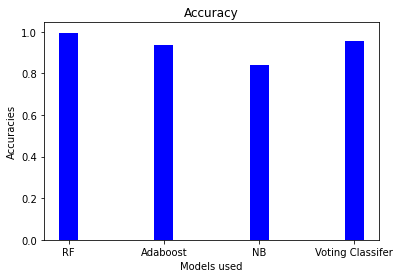

In [35]:
plt.bar(Models, accuracies, color ='Blue',
        width = 0.2)
 
plt.xlabel("Models used")
plt.ylabel("Accuracies")
plt.title("Accuracy")
plt.show()